In [2]:
import csv 
# java-0,javascrip-1,c#-2,php-3,android-4,jquery-5,c++-6,python-7,iphone-8,asp.net-9
def load_data(path):
    data_train = []
    label_train = []
    data_test = []
    label_test = []
    count=[0,0,0,0,0,0,0,0,0,0]
    with open(path) as in_file:
        reader = csv.DictReader(in_file)
        for row in reader:
            if 'java' in row['Tags']:
                if 'javascrip' not in row['Tags']:
                    if count[0] >13999   and count[0] < 20000:
                        data_test.append(row['Title'])
                        label_test.append(row['Tags'])
                        count[0] += 1
                    if count[0] < 14000:
                        data_train.append(row['Title'])
                        label_train.append(row['Tags'])
                        count[0] += 1
                else:
                    if count[1] > 13999 and count[1] < 20000:
                        data_test.append(row['Title'])
                        label_test.append(row['Tags'])
                        count[1] += 1
                    if count[1] < 14000:
                        data_train.append(row['Title'])
                        label_train.append(row['Tags'])
                        count[1] += 1
            elif 'c#' in row['Tags']:
                if count[2] > 13999 and count[2] < 20000:
                    data_test.append(row['Title'])
                    label_test.append(row['Tags'])
                    count[2] += 1
                if count[2] < 14000:
                    data_train.append(row['Title'])
                    label_train.append(row['Tags'])
                    count[2] += 1
            elif 'php' in row['Tags']:
                if count[3] > 13999 and count[3] < 20000:
                    data_test.append(row['Title'])
                    label_test.append(row['Tags'])
                    count[3] += 1
                if count[3] < 14000:
                    data_train.append(row['Title'])
                    label_train.append(row['Tags'])
                    count[3] += 1
            elif 'android' in row['Tags']:
                if count[4] > 13999 and count[4] < 20000:
                    data_test.append(row['Title'])
                    label_test.append(row['Tags'])
                    count[4] += 1
                if count[4] < 14000:
                    data_train.append(row['Title'])
                    label_train.append(row['Tags'])
                    count[4] += 1
            elif 'jquery' in row['Tags']:
                if count[5] > 13999 and count[5] < 20000:
                    data_test.append(row['Title'])
                    label_test.append(row['Tags'])
                    count[5] += 1
                if count[5] < 14000:
                    data_train.append(row['Title'])
                    label_train.append(row['Tags'])
                    count[5] += 1
            elif 'c++' in row['Tags']:
                if count[6] > 6999 and count[6] < 10000:
                    data_test.append(row['Title'])
                    label_test.append(row['Tags'])
                    count[6] += 1
                if count[6] < 7000:
                    data_train.append(row['Title'])
                    label_train.append(row['Tags'])
                    count[6] += 1
            elif 'python' in row['Tags']:
                if count[7] > 6999 and count[7] < 10000:
                    data_test.append(row['Title'])
                    label_test.append(row['Tags'])
                    count[7] += 1
                if count[7] < 7000:
                    data_train.append(row['Title'])
                    label_train.append(row['Tags'])
                    count[7] += 1
            elif 'iphone' in row['Tags']:
                if count[8] > 6999 and count[8] < 10000:
                    data_test.append(row['Title'])
                    label_test.append(row['Tags'])
                    count[8] += 1
                if count[8] < 7000:
                    data_train.append(row['Title'])
                    label_train.append(row['Tags'])
                    count[8] += 1
            elif 'asp.net' in row['Tags']:
                if count[9] > 6999 and count[9] < 10000:
                    data_test.append(row['Title'])
                    label_test.append(row['Tags'])
                    count[9] += 1
                if count[9] < 7000:
                    data_train.append(row['Title'])
                    label_train.append(row['Tags'])
                    count[9] += 1
    return data_train, label_train, data_test, label_test

(data_train, label_train, data_test, label_test) = load_data("Train_Title.csv")
print(len(data_train), len(label_train))
print(len(data_test),len(label_test))

112000 112000
48000 48000


In [3]:
def count_element(begin, end, token):
    k = 0
    for i in range(begin, end):
        if token in label_new_test[i]:
            k+= 1
    return k

def count_java(begin, end):
    k = 0
    for i in range(begin, end):
        if 'java' in label_new_test[i]:
            if 'javascrip' not in label_new_test[i]:
                k+= 1
    return k


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
def cacalator_count_vect(data_train):
    count_vect = CountVectorizer(stop_words="english", lowercase=True)
    data_train_count = count_vect.fit_transform(data_train)
    return data_train_count, count_vect

In [5]:
from sklearn.feature_extraction.text import TfidfTransformer
def caculator_tfidf(data_train_count):
    tfidf_tranformer = TfidfTransformer(norm='l2')
    data_train_tfidf = tfidf_tranformer.fit_transform(data_train_count)
    return data_train_tfidf,tfidf_tranformer

In [6]:
import numpy as np
def caculator_data_test(data_test, count_vect, tfidf_tranformer):
    data_test_counts = count_vect.transform(data_test)
    data_test_tfidf = tfidf_tranformer.transform(data_test_counts)
    return data_test_tfidf

In [7]:
import random
def random_data( begin, number):
    data_knn =[]
    label_knn =[]
    idx = random.sample(range(number), int(number/10))
    for i in range(len(idx)):
        data_knn.append(data_train[idx[i]+begin])
        label_knn.append(label_train[idx[i]+begin])
    return data_knn,label_knn

def contructor_knn():
    data_all=[]
    label_all =[]
    data,label = random_data(0, 7000)
    data_all = sum([data_all, data], [])
    label_all = sum([label_all, label], [])
    data,label = random_data(7000, 14000)
    data_all = sum([data_all, data], [])
    label_all = sum([label_all, label], [])
    data,label = random_data(21000, 14000)
    data_all = sum([data_all, data], [])
    label_all = sum([label_all, label], [])
    data,label = random_data(35000, 14000)
    data_all = sum([data_all, data], [])
    label_all = sum([label_all, label], [])
    data,label = random_data(49000, 14000)
    data_all = sum([data_all, data], [])
    label_all = sum([label_all, label], [])
    data,label = random_data(63000, 14000)
    data_all = sum([data_all, data], [])
    label_all = sum([label_all, label], [])
    data,label = random_data(77000, 14000)
    data_all = sum([data_all, data], [])
    label_all = sum([label_all, label], [])
    data,label = random_data(91000, 7000)
    data_all = sum([data_all, data], [])
    label_all = sum([label_all, label], [])
    data,label = random_data(98000, 7000)
    data_all = sum([data_all, data], [])
    label_all = sum([label_all, label], [])
    data,label = random_data(105000, 7000)
    data_all = sum([data_all, data], [])
    label_all = sum([label_all, label], [])
    return data_all, label_all 

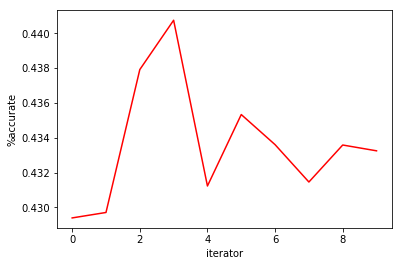

In [8]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=78, weights='distance', algorithm='auto')
data = []
iterator = []
for i in range(10):
    data_train2, label_train2= contructor_knn()
    data_train_count, count_vect = cacalator_count_vect(data_train2)
    data_train_tfidf, tfidf_tranformer = caculator_tfidf(data_train_count)
    neigh.fit(data_train_tfidf, label_train2)
    data_test_tfidf = caculator_data_test(data_test,count_vect,tfidf_tranformer)
    label_new_test=neigh.predict(data_test_tfidf)
    data.append(np.mean(label_new_test ==  label_test))
    iterator.append(i)
    
import matplotlib.pyplot as plt
plt.plot(iterator, data, 'r-')
plt.ylabel('%accurate')
plt.xlabel('iterator')
plt.show()


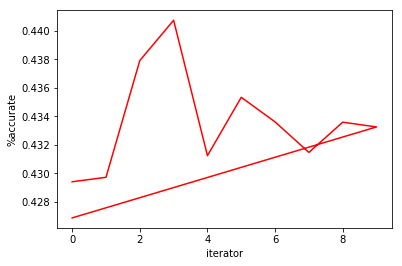

In [9]:
for i in range(1):
    data_train2, label_train2= contructor_knn()
    data_train_count, count_vect = cacalator_count_vect(data_train2)
    data_train_tfidf, tfidf_tranformer = caculator_tfidf(data_train_count)
    neigh.fit(data_train_tfidf, label_train2)
    data_test_tfidf = caculator_data_test(data_test,count_vect,tfidf_tranformer)
    label_new_test=neigh.predict(data_test_tfidf)
    data.append(np.mean(label_new_test ==  label_test))
    iterator.append(i)
    
import matplotlib.pyplot as plt
plt.plot(iterator, data, 'r-')
plt.ylabel('%accurate')
plt.xlabel('iterator')
plt.show()

In [10]:
c_plus_plus = count_element(0, 3000, 'c++')
php = count_element(3000, 9000, 'php')
javascrip = count_element(9000, 15000, 'javascrip')
java = count_java(15000, 21000)
android = count_element(21000, 27000, 'android')
jquery = count_element(27000, 33000, 'jquery')
c_sharp = count_element(33000, 39000, 'c#')
python = count_element(39000, 42000, 'python')
iphone = count_element(42000, 45000, 'iphone')
asp_net = count_element(45000, 48000, 'asp.net')

Y_KNN = np.array([c_plus_plus, php, javascrip, java, android, jquery, python, iphone, asp_net])


In [11]:
print(Y_KNN)

[ 575 1501 1211 2737 4420 4293 1217 1175  953]
